In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.columns = ['C_ID','Gender','Age','AnnualIncome','SpendingScore']
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.shape

(200, 5)

#### Problem Statement - Based on AnnualIncome and Spending Score, create different clusters

In [22]:
x = df.iloc[:,3:].values
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


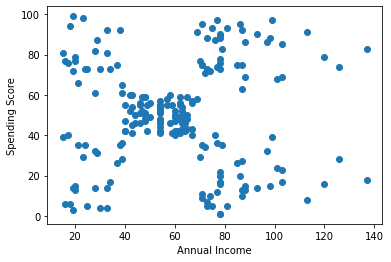

In [23]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Elbow Method

In [24]:
from sklearn.cluster import KMeans

WCSS
 [269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37442.24745037571, 30241.343617936585, 25018.78161341407, 21818.114588452183, 19728.449114614334, 17584.589416163646, 16219.643432089732, 14437.201795784862, 13243.194632560422, 11929.051692914929, 10850.655377271683]


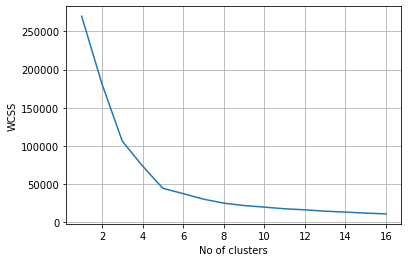

In [25]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,17): # i = no of clusters,
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,17)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### Optimal number of clusters from the Elbow Method = 5

### Applying KMeans at K=5

In [26]:
k5 = KMeans(n_clusters=5)
k5.fit(x)
ypred5 = k5.predict(x)
print(ypred5)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [27]:
labels5 = k5.labels_
print(labels5)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [28]:
cent5 = k5.cluster_centers_
print(cent5)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


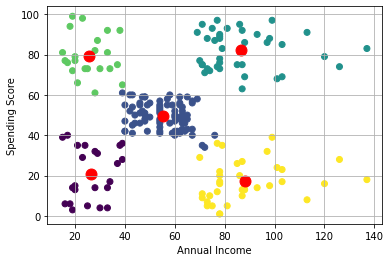

In [29]:
plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='o',s=120)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.show()

In [31]:
df['Cls5'] = ypred5
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore,Cls5
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [32]:
df['Cls5'].value_counts()

1    81
2    39
4    35
0    23
3    22
Name: Cls5, dtype: int64

In [50]:
r1 = df.groupby(['Cls5'])['AnnualIncome','SpendingScore'].mean()
r1.T

<ipython-input-50-b710dd35cd56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r1 = df.groupby(['Cls5'])['AnnualIncome','SpendingScore'].mean()


Cls5,0,1,2,3,4
AnnualIncome,26.304348,55.296296,86.538462,25.727273,88.200000
SpendingScore,20.913043,49.518519,82.128205,79.363636,17.114286


In [34]:
res = df.iloc[:,3:].groupby(['Cls5']).mean().T
res

Cls5,0,1,2,3,4
AnnualIncome,26.304348,55.296296,86.538462,25.727273,88.200000
SpendingScore,20.913043,49.518519,82.128205,79.363636,17.114286


In [ ]:
# Cls0 -> Low AnnualIncome, Low spending score
# Cls1 -> Medium AnnualIncome, Medium spending score
# Cls2 -> High AnnualIncome, High spending score
# Cls3 -> Low AnnualIncome, High spending score
# Cls4 -> High AnnualIncome, Low spending score

### Applying KMeans at K=3

In [36]:
k3 = KMeans(n_clusters=3)
k3.fit(x)
ypred3 = k3.predict(x)
print(ypred3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [37]:
cent3 = k3.cluster_centers_
print(cent3)

[[87.         18.63157895]
 [44.15447154 49.82926829]
 [86.53846154 82.12820513]]


In [46]:
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

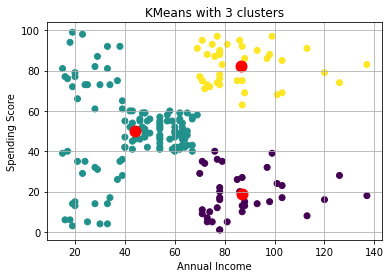

In [38]:
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',marker='o',s=120)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans with 3 clusters')
plt.grid()
plt.show()

In [47]:
df['Cls3'] = ypred3
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore,Cls5,Cls3
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,0,1


In [51]:
df['Cls3'].value_counts()

1    123
2     39
0     38
Name: Cls3, dtype: int64

In [48]:
res3 = df.iloc[:,[3,4,6]]
res3.head()

,AnnualIncome,SpendingScore,Cls3
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1


In [49]:
cls3_res = res3.groupby(['Cls3']).mean().T
cls3_res

Cls3,0,1,2
AnnualIncome,87.000000,44.154472,86.538462
SpendingScore,18.631579,49.829268,82.128205


### Silhoutte Score

In [52]:
from sklearn.metrics import silhouette_score

In [55]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte Score at K={i}',silhouette_score(x,m.labels_))

Silhoutte Score at K=2 0.2968969162503008
Silhoutte Score at K=3 0.46761358158775435
Silhoutte Score at K=4 0.4931963109249047
Silhoutte Score at K=5 0.553931997444648
Silhoutte Score at K=6 0.53976103063432
Silhoutte Score at K=7 0.5288104473798049
Silhoutte Score at K=8 0.4548653400650936
Silhoutte Score at K=9 0.457462901394195


### Apply KMeans at K=8